In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
''' Q What is the shape of "movies.csv" ? '''
# Dataset loaded
dfm = pd.read_csv('./movies.csv')

# The shape of Dataset
shape = dfm.shape

print(f"The shape of the movies dataset is: {shape}")

The shape of the movies dataset is: (9742, 3)


In [10]:
''' Q What is the shape of "ratings.csv" ? '''
# Loading the dataset
dfr = pd.read_csv('./ratings.csv')

# The shape of the dataset
shape = dfr.shape

print(f"The shape of the ratings dataset is: {shape}")

The shape of the ratings dataset is: (100836, 4)


In [11]:
''' Q How many unique "userId" are available in "ratings.csv" ? '''
# number of unique userId values
unique_users = dfr['userId'].nunique()
# Here we are using nunique() to count the number of unique values in the userId column.
print(f"The number of unique userId values is: {unique_users}")

The number of unique userId values is: 610


In [19]:
''' Q Which movie has recieved maximum number of user ratings ? '''

# movieId with the maximum number of ratings
most_rated_movie = dfr['movieId'].value_counts().idxmax()
rating_count = dfr['movieId'].value_counts().max()

# movie name using the movieId
most_rated_movie_name = dfm.loc[dfm['movieId'] == most_rated_movie, 'title'].values[0]

print(f"The movie with ID {most_rated_movie} has received the maximum number of user ratings : {rating_count}, and its title is: {most_rated_movie_name}")

The movie with ID 356 has received the maximum number of user ratings : 329, and its title is: Forrest Gump (1994)


In [20]:
''' Q Select all the correct tags submitted by users to "Matrix, The (1999)" movie ? '''

# Loading the datasets
dft = pd.read_csv('tags.csv')

# Finding the movieId for "Matrix, The (1999)"
matrix_movie_id = dfm.loc[dfm['title'] == "Matrix, The (1999)", 'movieId'].values[0]

# Finding all tags associated with this movieId
matrix_tags = dft.loc[dft['movieId'] == matrix_movie_id, 'tag'].unique()

print(f"The tags associated with 'Matrix, The (1999)' are: {matrix_tags}")


The tags associated with 'Matrix, The (1999)' are: ['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [21]:
''' Q What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?'''

# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = dfm.loc[dfm['title'] == "Terminator 2: Judgment Day (1991)", 'movieId'].values[0]

# Filter ratings for this movieId and calculate the average rating
average_rating = dfr.loc[dfr['movieId'] == terminator_movie_id, 'rating'].mean()

print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


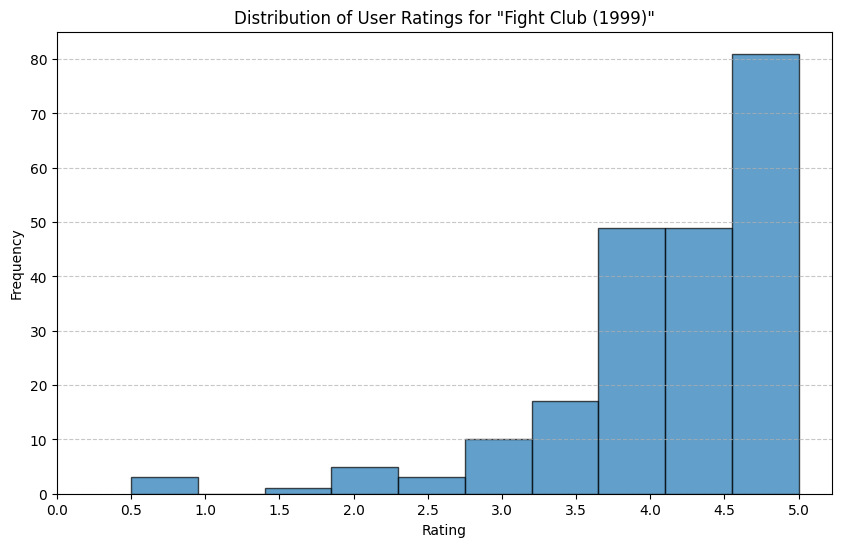

In [23]:
''' Q How does the data distribution of user ratings for "Fight Club (1999)" movie looks like ? '''

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = dfm.loc[dfm['title'] == "Fight Club (1999)", 'movieId'].values[0]

# Filter ratings for this movieId
fight_club_ratings = dfr.loc[dfr['movieId'] == fight_club_movie_id, 'rating']

# Plot the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks([0.5 * i for i in range(11)])  # Set x-ticks to correspond to rating values (e.g., 0.5, 1.0, ..., 5.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

    
    As we can see above it looks like Right-skewed Distribution.

In [26]:
''' Mandatory Operations '''

# Group by movieId and aggregate
grouped_ratings_df = dfr.groupby('movieId').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Merge the grouped ratings with the movies data
merged_df = pd.merge(grouped_ratings_df, dfm, on='movieId')

# Filter movies with more than 50 ratings
filtered_movies_df = merged_df[merged_df['rating_count'] > 50]

In [27]:
''' Q Which movie is the most popular based on  average user ratings ? '''

# Sort the filtered movies DataFrame by average_rating in descending order
sorted_movies_df = filtered_movies_df.sort_values(by='average_rating', ascending=False)

# Getting the most popular movie based on average user ratings
most_popular_movie = sorted_movies_df.iloc[0]

# Extracting the movie details
most_popular_movie_title = most_popular_movie['title']
most_popular_movie_rating = most_popular_movie['average_rating']

most_popular_movie_title, most_popular_movie_rating

('Shawshank Redemption, The (1994)', 4.429022082018927)

In [28]:
''' Q Top 5 movies '''

# Sort the filtered movies DataFrame by rating_count in descending order
sorted_by_ratings_df = filtered_movies_df.sort_values(by='rating_count', ascending=False)

# Get the top 5 movies based on the number of user ratings
top_5_movies = sorted_by_ratings_df.head(5)

# Extract relevant details for display
top_5_movies_summary = top_5_movies[['title', 'rating_count']]

top_5_movies_summary


,title,rating_count
314,Forrest Gump (1994),329
277,"Shawshank Redemption, The (1994)",317
257,Pulp Fiction (1994),307
510,"Silence of the Lambs, The (1991)",279
1938,"Matrix, The (1999)",278


In [30]:
''' Q Which Sci-Fi movie is "third most popular" based on the number of user ratings? '''

# First, filter for Sci-Fi movies
sci_fi_movies_df = filtered_movies_df[filtered_movies_df['genres'].str.contains('Sci-Fi', case=False)]

# Sort the Sci-Fi movies by rating_count in descending order
sorted_sci_fi_df = sci_fi_movies_df.sort_values(by='rating_count', ascending=False)

# Get the third most popular Sci-Fi movie
third_most_popular_sci_fi = sorted_sci_fi_df.iloc[2]  # Index 2 corresponds to the third item

# Extract relevant details for display
third_most_popular_sci_fi_title = third_most_popular_sci_fi['title']
third_most_popular_sci_fi_rating_count = third_most_popular_sci_fi['rating_count']

third_most_popular_sci_fi_title, third_most_popular_sci_fi_rating_count


('Jurassic Park (1993)', 238)

In [36]:
''' Q Web Scraping '''

import requests
import numpy as np
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', attrs={'itemprop': 'ratingValue'})
    return imdb_rating.text if imdb_rating else np.nan

